In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV


from sklearn.svm import SVC
import seaborn as sns



70000
['Unnamed: 0', 'id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'physical activity', 'cardio']


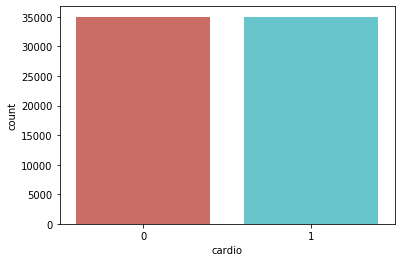

   Unnamed: 0  id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  \
0           0   0  18393       2     168    62.0    110     80            1   
1           1   1  20228       1     156    85.0    140     90            3   
2           2   2  18857       1     165    64.0    130     70            3   
3           3   3  17623       2     169    82.0    150    100            1   
4           4   4  17474       1     156    56.0    100     60            1   

   gluc  smoke  alco  physical activity  cardio  
0     1      0     0                  1       0  
1     1      0     0                  1       1  
2     1      0     0                  0       1  
3     1      0     0                  1       1  
4     1      0     0                  0       0  


<Figure size 432x288 with 0 Axes>

In [2]:
#Read csv file
data = pd.read_csv('new_cardio_train.csv')
data.head()
#data = data[1:10]
print(len(data))
#df=data.drop(columns=['Unnamed: 0'])
df=data
print(list(df.columns))
data['cardio'].value_counts()
sns.countplot(x='cardio',data=df, palette='hls')  #Show plot of target counts
plt.show()
plt.savefig('count_plot')
df.groupby('cardio').mean()
#df['cholesterol']=np.where(df['cholesterol']==3,2,df['cholesterol'])
#df['gluc']=np.where(df['gluc']==3,2,df['gluc'])
#df['cholesterol'].unique()

print(df.head())

In [3]:
df.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,physical activity,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


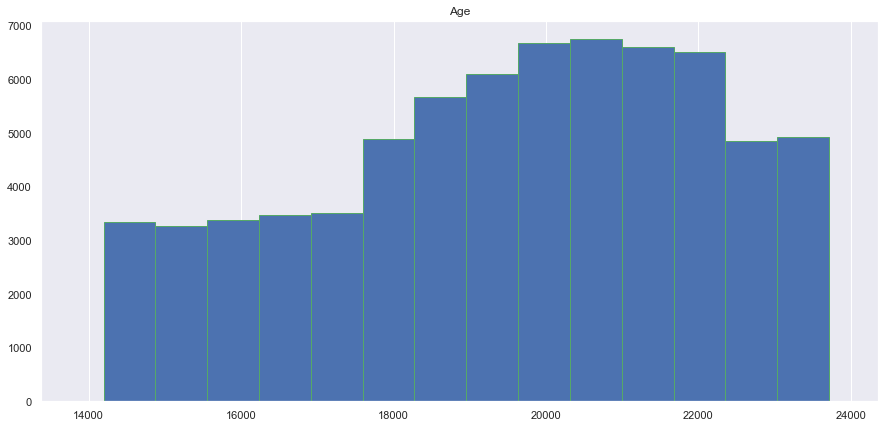

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(15,7))
counts, bins, patches = ax.hist(df["age"], bins=19, edgecolor='g')
#ax.set_xticks(bins)
ax.set_xlim(left=13381)

bin_centers = 0.5 * np.diff(bins[4:]) + bins[4:-1]
for count, x in zip(counts[4:], bin_centers):
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
#     ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
#         xytext=(0, -18), textcoords='offset points', va='top', ha='center')
    
plt.title("Age")
ax.grid(axis='y')

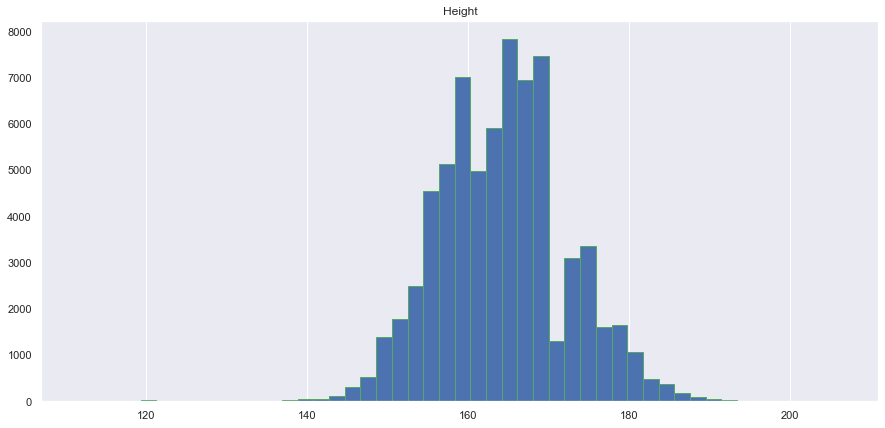

In [5]:
fig, ax = plt.subplots(figsize=(15,7))
counts, bins, patches = ax.hist(df["height"], bins=100, edgecolor='g')
#ax.set_xticks(bins)
ax.set_xlim(left=107, right=211)

bin_centers = 3 * np.diff(bins[5:-4]) + bins[5:-5]
for count, x in zip(counts[5:-4], bin_centers):
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
#     ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
#         xytext=(0, -18), textcoords='offset points', va='top', ha='center')
    
plt.title("Height")
ax.grid(axis='y')

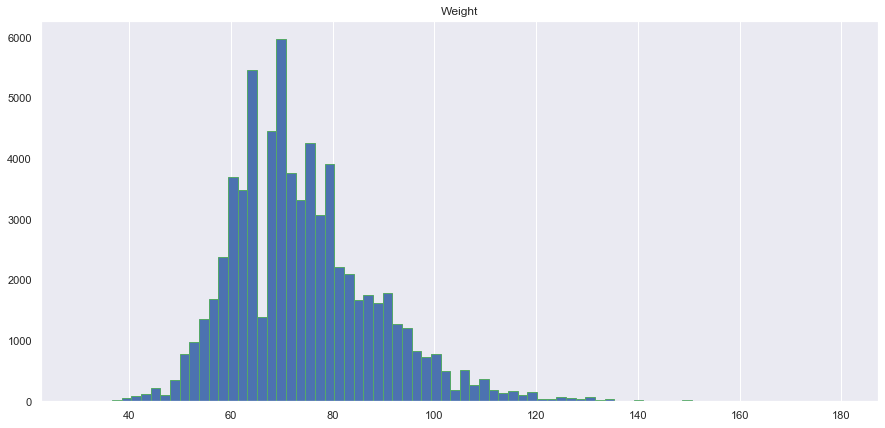

In [6]:
fig, ax = plt.subplots(figsize=(15,7))
counts, bins, patches = ax.hist(df["weight"], bins=100, edgecolor='g')
#ax.set_xticks(bins)
ax.set_xlim(left=22.7, right=187.3)

bin_centers = 3 * np.diff(bins[2:-2]) + bins[2:-3]
for count, x in zip(counts[2:-2], bin_centers):
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
#     ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
#         xytext=(0, -18), textcoords='offset points', va='top', ha='center')
    
plt.title("Weight")
ax.grid(axis='y')

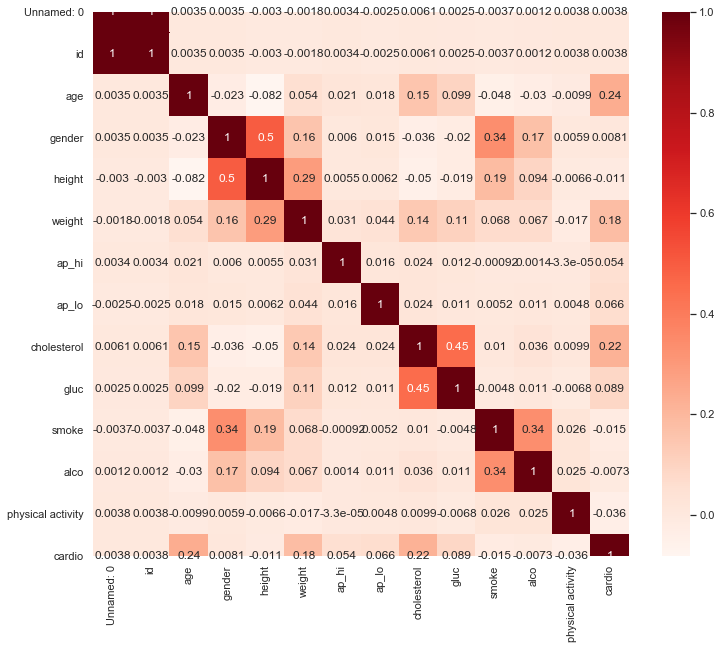

cardio    1.0
Name: cardio, dtype: float64

In [7]:
#Plot correlation matrix
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
#Correlation with output variable
cor_target = abs(cor["cardio"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

In [8]:
#RFECV
correlated_features = set()
correlation_matrix=df.drop(columns=['id','cardio']).corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.2:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print(correlated_features)

{'height', 'weight', 'gluc', 'alco', 'smoke'}


In [9]:
X = df.drop(columns=['id','cardio'], axis=1) #Drop columns id and cardio
target = df['cardio'] 

X.head()

,Unnamed: 0,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,physical activity
0,0,18393,2,168,62.0,110,80,1,1,0,0,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0


FEATURE SELECTON 


In [10]:
#K-best feature selecting

mini=min(df['ap_hi'])
X['ap_hi']=X['ap_hi']-mini
mini=min(df['ap_lo'])
X['ap_lo']=X['ap_lo']-mini

#for feature selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
y=df['cardio']
#apply SelectKBest class to extract best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


                Specs         Score
1                 age  1.241403e+06
6               ap_lo  6.444831e+04
5               ap_hi  1.767150e+04
0          Unnamed: 0  1.179587e+04
4              weight  6.451195e+03
7         cholesterol  1.158951e+03
8                gluc  1.490774e+02
11  physical activity  1.746439e+01
9               smoke  1.530758e+01
10               alco  3.559012e+00


In [11]:
# 2) LassoCV() feature selecting
#Embedded Method LASSO


reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Best alpha using built-in LassoCV: 0.293797
Best score using built-in LassoCV: 0.088521
Lasso picked 5 variables and eliminated the other 7 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

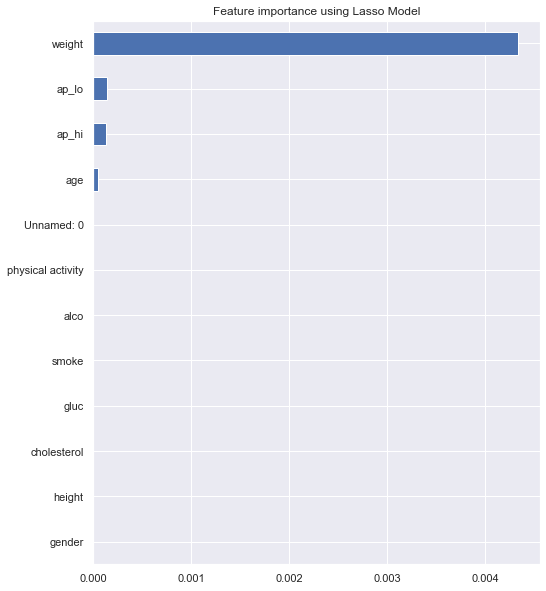

In [12]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

LOGISTIC CLASSIFIER PART


In [13]:

rfecv = RFECV(LogisticRegression(), step=1, cv=StratifiedKFold(2), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='warn', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='warn', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

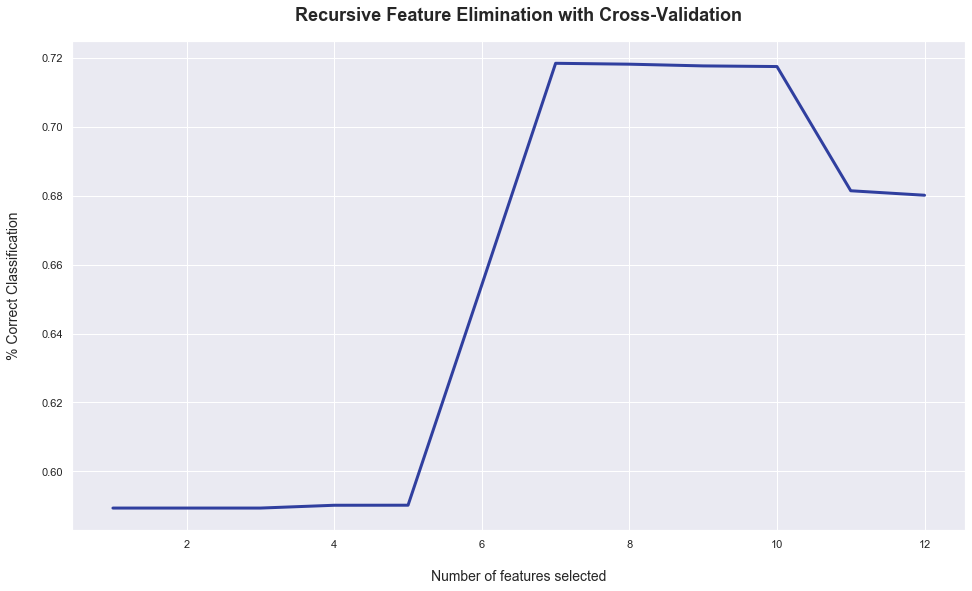

In [14]:
#1) recursive feature selecting

plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [15]:
from sklearn.feature_selection import RFE
X.columns
print(X.columns)
y=df['cardio']
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 8)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Index(['Unnamed: 0', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'physical activity'],
      dtype='object')
Num Features: 8
Selected Features: [False False  True  True False  True False  True  True  True  True  True]
Feature Ranking: [5 4 1 1 2 1 3 1 1 1 1 1]


In [16]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 7


In [17]:
#Prepare data and split
#x=X
x=X.drop(columns=['age','weight','ap_lo'])
print(x.columns)
y=df['cardio']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=109)

Index(['Unnamed: 0', 'gender', 'height', 'ap_hi', 'cholesterol', 'gluc',
       'smoke', 'alco', 'physical activity'],
      dtype='object')


In [18]:
#Use logisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[[ 5.30258379e-07  4.84906353e-02 -6.02552184e-03  4.79246620e-02
   5.78013631e-01 -8.51795895e-02 -1.70339465e-01 -1.49744582e-01
  -2.11888255e-01]]
[-12.8149111]


In [19]:
#Prediction and accuracy
logi_y_pred = lr.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.72


In [20]:
#for Logistic Roc curve
logi_predict_proba = lr.predict_proba(x_test)[:,1]

NAIVE BAYES PART


In [21]:
#depends on K-best

X = X[['age' ,'ap_lo','ap_hi', 'weight', 'cholesterol','gluc','physical activity']]
y=df['cardio']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109)

In [22]:
#Use softvectorclassifier

from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()
naive.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
y_pred = naive.predict(x_test)
print('Accuracy of Navie classifier on test set: {:.2f}'.format(naive.score(x_test, y_test)))

Accuracy of Navie classifier on test set: 0.59


In [24]:
from sklearn.multiclass import OneVsRestClassifier
# Compute ROC curve and ROC area for each class

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

n_classes = len(y) #70000


classifier = OneVsRestClassifier(naive)
y_score_nav = naive.fit(x_train, y_train).predict_proba(x_test)

# Compute micro-average ROC curve and ROC area
fpr_nav = dict()
tpr_nav = dict()
roc_auc_nav = dict()
for i in range(n_classes):
    fpr_nav[i], tpr_nav[i], _ = roc_curve(y_test, y_score_nav[:, 1])
    roc_auc_nav[i] = auc(fpr_nav[i], tpr_nav[i])
    #print(i)

DECISION TREES PART

In [25]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz



dft = pd.read_csv('cardio_train.csv',index_col='id', sep= ";")

In [26]:
dft['age'] = dft['age'].apply(lambda x: np.floor(x/365.25))
dft = pd.get_dummies(df, columns=['cholesterol', 'gluc'])

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(dft.drop('cardio', axis=1).values, dft['cardio'].values, test_size = 0.3, random_state = 17)

In [28]:
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

In [29]:
clf_tree = DecisionTreeClassifier(max_depth=3, random_state=17)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

In [30]:
tree_graph_to_png(tree = clf_tree, feature_names=dft.drop('cardio', axis=1).columns, 
                 png_file_to_save='decision_tree.png')

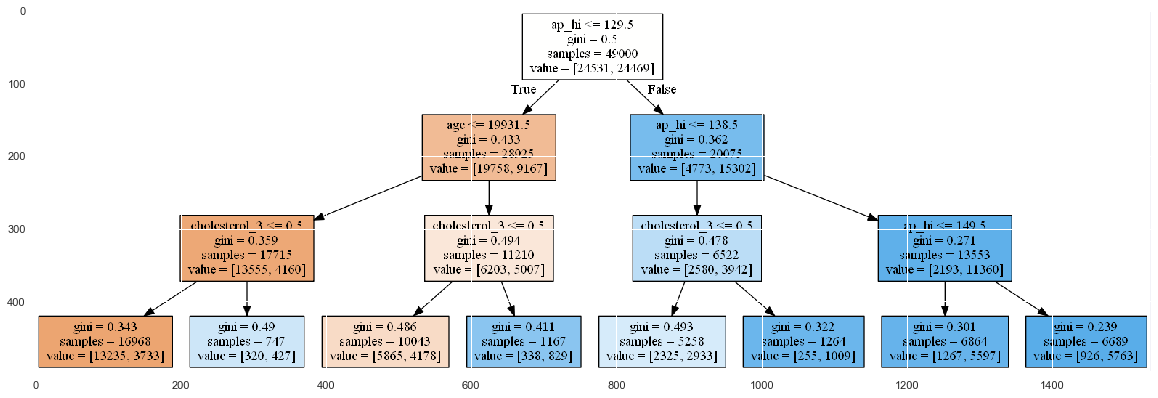

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

tree_graph_to_png(tree = clf_tree, feature_names=dft.drop('cardio', axis=1).columns, 
                 png_file_to_save='decision_tree.png')
img = mpimg.imread("decision_tree.png")
plt.figure(figsize=(20, 16))
plt.imshow(img)
plt.show()

In [32]:
from sklearn.metrics import accuracy_score
y_pred = clf_tree.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
print(acc) 

0.7212857142857143


In [33]:
tree_params = {'max_depth': list(range(2, 11))}

tree_grid = GridSearchCV(clf_tree, tree_params, scoring='accuracy', cv = 5)

In [34]:
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fal

In [35]:
tree_grid.cv_results_

{'mean_fit_time': array([0.05640354, 0.09047713, 0.15911126, 0.123703  , 0.16873431,
        0.20648551, 0.20459833, 0.21561027, 0.21873264]),
 'std_fit_time': array([0.00746684, 0.01795459, 0.02206535, 0.00410404, 0.02295924,
        0.02485096, 0.0344159 , 0.01169002, 0.0098822 ]),
 'mean_score_time': array([0.        , 0.00059943, 0.00299911, 0.        , 0.        ,
        0.00433536, 0.00119934, 0.        , 0.00312533]),
 'std_score_time': array([0.        , 0.00119886, 0.00109489, 0.        , 0.        ,
        0.00726515, 0.00146889, 0.        , 0.00625067]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 9},
  {'max_depth': 10}],
 'split0_t

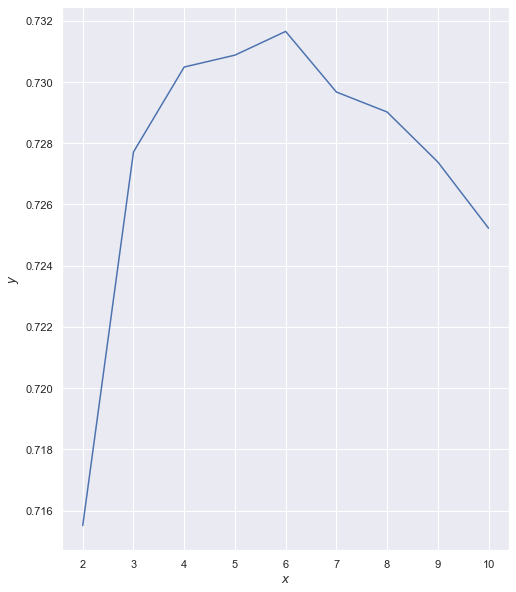

In [36]:
y = tree_grid.cv_results_['mean_test_score']
x = np.arange(2,11)
plt.plot(x, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');


In [43]:
acc2 = tree_grid.best_score_
acc1 = acc
print(acc1)
print(acc2)
print((acc2-acc1)/acc1 * 100)


0.7212857142857143
0.7316530612244898
1.4373426138132008


Best: -0.000032 using {'n_estimators': 250}
-0.003287 (0.000000) with: {'n_estimators': 50}
-0.000044 (0.000000) with: {'n_estimators': 100}
-0.000032 (0.000000) with: {'n_estimators': 150}
-0.000032 (0.000000) with: {'n_estimators': 200}
-0.000032 (0.000000) with: {'n_estimators': 250}
-0.000032 (0.000000) with: {'n_estimators': 300}
-0.000032 (0.000000) with: {'n_estimators': 350}


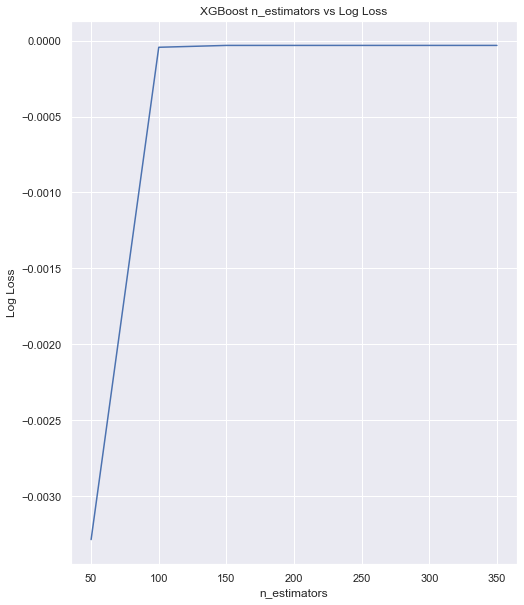

In [38]:
# XGBoost on the cardio dataset, Tune n_estimators
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
# load data
data = read_csv('new_cardio_train.csv')
dataset = data.values
# split data into X and y
X = dataset[:,0:94]
y = dataset[:,13]
# encode string class values as integers
label_encoded_y = LabelEncoder().fit_transform(y)
# grid search
model = XGBClassifier()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("XGBoost n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators.png')

Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV


Randomf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(Randomf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the randomf to the best combination of parameters
Randomf = grid_obj.best_estimator_


#X_train, X_valid, y_train, y_valid = train_test_split(dft.drop('cardio', axis=1).values, dft['cardio'].values, test_size = 0.3, random_state = 17)

# Fit the best algorithm to the data. 
Randomf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
from sklearn.metrics import accuracy_score
y_pred = Randomf.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
print(acc) 

0.7315238095238096


RESULT


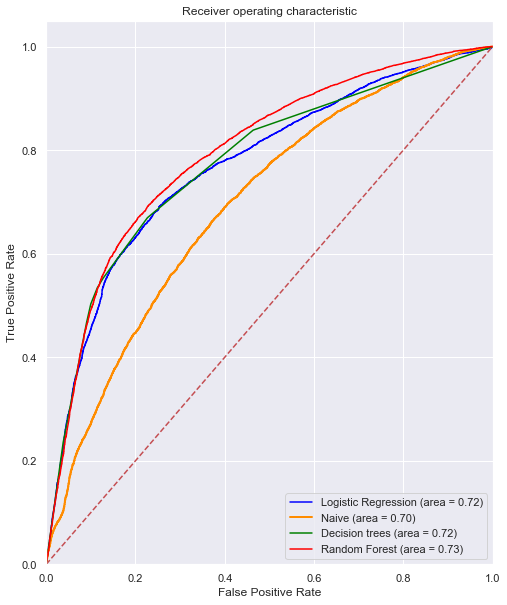

In [45]:
#Plot ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#logit_roc_auc = roc_auc_score(y_test, lr.predict(x_test))
#fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])


# Compute micro-average ROC curve and ROC area
#navie#
fpr_nav["micro"], tpr_nav["micro"], _ = roc_curve(y_test, y_score_nav[:, 1])
roc_auc_nav["micro"] = auc(fpr_nav["micro"], tpr_nav["micro"])

#logistic#
logit_roc_auc = roc_auc_score(y_test, logi_y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logi_predict_proba)

#Decision Tree
dec_roc_auc = roc_auc_score(y_valid, clf_tree.predict(X_valid))
fprr, tprr, thresholdss = roc_curve(y_valid, clf_tree.predict_proba(X_valid)[:,1])

#Random Forest
ran_roc_auc = roc_auc_score(y_valid, Randomf.predict(X_valid))
fprrr, tprrr, thresholdsss = roc_curve(y_valid, Randomf.predict_proba(X_valid)[:,1])


plt.figure()
plt.plot(fpr, tpr, color='blue',label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr_nav[2], tpr_nav[2], color='darkorange', lw=2, label='Naive (area = %0.2f)' % roc_auc_nav[2])
plt.plot(fprr, tprr, color='green', label='Decision trees (area = %0.2f)' % dec_roc_auc)
plt.plot(fprrr, tprrr,color='red', label='Random Forest (area = %0.2f)' % ran_roc_auc) 
plt.plot([0, 1], [0, 1],'r--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()